In [9]:
from numpy import arange
from random import sample

min_neighbours_range = range(1, 10)
min_neighbours_sample = sorted(sample(min_neighbours_range, 5))
scale_factor_range = arange(1.01, 3, 0.01)
scale_factor_sample: list[float] = sorted(sample(scale_factor_range.tolist(), 10))
min_neighbours_sample, scale_factor_sample


([3, 5, 6, 8, 9],
 [1.3000000000000003,
  1.3800000000000003,
  1.5600000000000005,
  1.7200000000000006,
  1.8100000000000007,
  2.5200000000000014,
  2.530000000000001,
  2.5400000000000014,
  2.8500000000000014,
  2.9600000000000017])

In [3]:
import cv2
from numpy import ndarray, dtype, generic

def prepare_input_image(image_path: str) -> ndarray[int, dtype[generic]]:
    img = cv2.imread(image_path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
import cv2
import timeit
from lab2_haar_cascades.definitions import DATA_DIR, HAAR_CASCADES_DIR, DATA_INPUT_DIR, DATA_OUTPUT_DIR

def detect(input_image: ndarray[int, dtype[generic]], output_path: str, scale_factor: float = 1.3, min_neighbours: int = 2):
    face_cascade = cv2.CascadeClassifier(str(HAAR_CASCADES_DIR / 'haarcascade_frontalface_default.xml'))
    # image, scaleFactor(1.00 ..), minNeighbors (1, 2, ..), minSize, maxSize
    faces = face_cascade.detectMultiScale(input_image, scale_factor, min_neighbours)
    img = input_image.copy()
    for (x,y,w,h) in faces:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
    print("Detected faces: %d" %len(faces))
    cv2.imwrite(output_path, img)
    return faces

In [12]:
from lab2_haar_cascades.definitions import (
    DATA_INPUT_DIR,
    DATA_OUTPUT_DIR,
)
import pandas as pd

input_image_1 = prepare_input_image(str(DATA_INPUT_DIR / "input_1.jpg"))
input_image_2 = prepare_input_image(str(DATA_INPUT_DIR / "input_2.jpg"))
rows = []
for i, min_neighbours in enumerate(min_neighbours_sample):
    for a, scale_factor in enumerate(scale_factor_sample):
        faces_1 = detect(
            input_image_1, str(DATA_OUTPUT_DIR / f"{i}_{a}_1.jpg"), scale_factor, min_neighbours
        )
        faces_2 = detect(
            input_image_2, str(DATA_OUTPUT_DIR / f"{i}_{a}_2.jpg"), scale_factor, min_neighbours
        )
        rows.append(
            {
                "image_name_1":  f"{i}_{a}_1.jpg",
                "image_name_2":  f"{i}_{a}_2.jpg",
                "min_neighbours": min_neighbours,
                "scale_factor": scale_factor,
                "detected_faces_image_1": len(faces_1),
                "faces_image_1": 4,
                "detected_faces_image_2": len(faces_2),
                "faces_image_2": 6,
            }
        )
df = pd.DataFrame.from_dict(rows)
df

Detected faces: 4
Detected faces: 4
Detected faces: 2
Detected faces: 3
Detected faces: 3
Detected faces: 3
Detected faces: 2
Detected faces: 2
Detected faces: 0
Detected faces: 3
Detected faces: 3
Detected faces: 4
Detected faces: 3
Detected faces: 4
Detected faces: 2
Detected faces: 3
Detected faces: 2
Detected faces: 4
Detected faces: 2
Detected faces: 1
Detected faces: 3
Detected faces: 4
Detected faces: 2
Detected faces: 3
Detected faces: 2
Detected faces: 3
Detected faces: 2
Detected faces: 1
Detected faces: 0
Detected faces: 3
Detected faces: 3
Detected faces: 3
Detected faces: 3
Detected faces: 3
Detected faces: 2
Detected faces: 3
Detected faces: 1
Detected faces: 4
Detected faces: 2
Detected faces: 0
Detected faces: 3
Detected faces: 4
Detected faces: 2
Detected faces: 3
Detected faces: 2
Detected faces: 3
Detected faces: 2
Detected faces: 0
Detected faces: 0
Detected faces: 3
Detected faces: 2
Detected faces: 3
Detected faces: 2
Detected faces: 3
Detected faces: 2
Detected f

,image_name_1,image_name_2,min_neighbours,scale_factor,detected_faces_image_1,faces_image_1,detected_faces_image_2,faces_image_2
0,0_0_1.jpg,0_0_2.jpg,3,1.30,4,4,4,6
1,0_1_1.jpg,0_1_2.jpg,3,1.38,2,4,3,6
2,0_2_1.jpg,0_2_2.jpg,3,1.56,3,4,3,6
3,0_3_1.jpg,0_3_2.jpg,3,1.72,2,4,2,6
4,0_4_1.jpg,0_4_2.jpg,3,1.81,0,4,3,6
5,0_5_1.jpg,0_5_2.jpg,3,2.52,3,4,4,6
6,0_6_1.jpg,0_6_2.jpg,3,2.53,3,4,4,6
7,0_7_1.jpg,0_7_2.jpg,3,2.54,2,4,3,6
8,0_8_1.jpg,0_8_2.jpg,3,2.85,2,4,4,6
9,0_9_1.jpg,0_9_2.jpg,3,2.96,2,4,1,6


In [13]:
df.to_csv(DATA_OUTPUT_DIR / "results.csv")

In [6]:
import pandas as pd
df = pd.read_csv(DATA_OUTPUT_DIR / "final_results.csv", index_col=0)
df.dropna(inplace=True)
df.describe()

,min_neighbours,scale_factor,faces_image_1,correct_im_1,incorrect_im_1,unrecognized_im_1,faces_image_2,correct_im_2,incorrect_im_2,unrecognized_im_2,total_faces,total_recognized,total_unrecognized
count,50.000000,50.000000,50.0,50.000000,50.0,50.000000,50.0,50.000000,50.0,50.000000,50.0,50.000000,50.000000
mean,6.200000,2.117000,4.0,1.620000,0.0,2.380000,6.0,2.360000,0.0,3.640000,10.0,3.980000,6.020000
std,2.157096,0.600392,0.0,1.007928,0.0,1.007928,0.0,1.273914,0.0,1.273914,0.0,1.963857,1.963857
min,3.000000,1.300000,4.0,0.000000,0.0,0.000000,6.0,0.000000,0.0,2.000000,10.0,0.000000,2.000000
25%,5.000000,1.560000,4.0,1.000000,0.0,2.000000,6.0,2.000000,0.0,3.000000,10.0,3.000000,5.000000
50%,6.000000,2.165000,4.0,2.000000,0.0,2.000000,6.0,3.000000,0.0,3.000000,10.0,4.500000,5.500000
75%,8.000000,2.540000,4.0,2.000000,0.0,3.000000,6.0,3.000000,0.0,4.000000,10.0,5.000000,7.000000
max,9.000000,2.960000,4.0,4.000000,0.0,4.000000,6.0,4.000000,0.0,6.000000,10.0,8.000000,10.000000


In [11]:
df["im_correct"] = list(zip(df["unrecognized_im_1"].astype(int), df["unrecognized_im_2"].astype(int)))
df.to_csv(DATA_OUTPUT_DIR / "tmp.csv")

Text(0, 0.5, 'Images (count)')

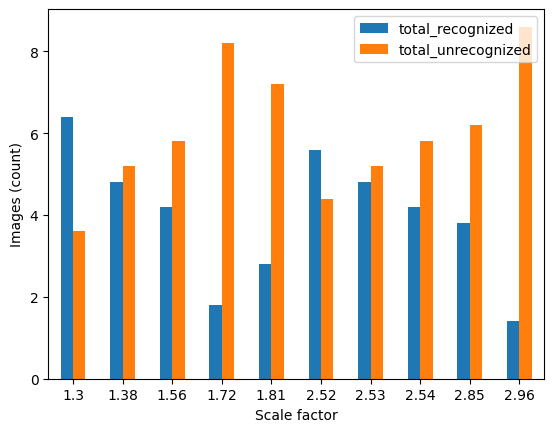

In [24]:
ax = df.groupby(["scale_factor"])[["total_recognized", "total_unrecognized"]].mean().plot.bar(rot=0)
ax.set_xlabel("Scale factor")
ax.set_ylabel("Images (count)")

Text(0, 0.5, 'Scale factor')

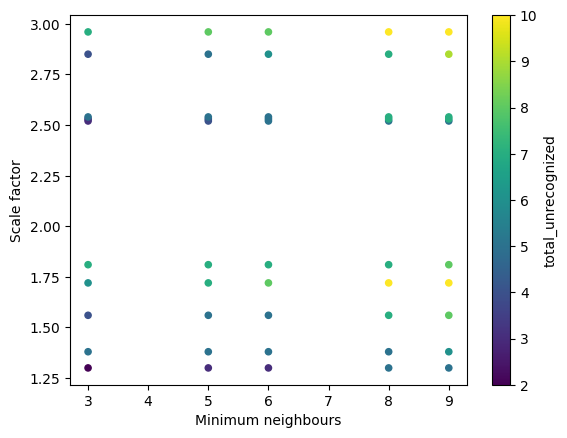

In [25]:
ax = df.plot.scatter(x="min_neighbours", y="scale_factor", c="total_unrecognized", colormap="viridis")
ax.set_xlabel("Minimum neighbours")
ax.set_ylabel("Scale factor")